In [37]:
import os
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [228]:
folder = '/Users/poulamisarkar/vadere/Scenarios/Demos/AirTransmissionModel/examples/output/1000_peds'
file_path = os.path.join(folder, "SIRinformation.csv")
if  os.path.exists(file_path):
    data = pd.read_csv(file_path, delimiter=" ")
    
ID_SUSCEPTIBLE=1
ID_INFECTED=0
ID_RECOVERED=3

pedestrian_ids = data['pedestrianId'].unique()
sim_times = data['simTime'].unique()
group_counts = pd.DataFrame(columns=['simTime', 'group-s', 'group-i', 'group-r','group-rec'])
group_counts['simTime'] = sim_times
group_counts['group-s'] = 0
group_counts['group-i'] = 0
group_counts['group-r'] = 0
group_counts['group-rec'] = 0

for pid in pedestrian_ids[:]:
    simtime_group = data[data['pedestrianId'] == pid][['simTime', 'groupId-PID5']].values
    #print(simtime_group)
    current_state = ID_SUSCEPTIBLE
    group_counts.loc[group_counts['simTime'] >= 0, 'group-s'] += 1
    
    
    for (st, g) in simtime_group:
        #print(g)
        if g != current_state and g == ID_INFECTED and current_state == ID_SUSCEPTIBLE:
            current_state = g
            #print(current_state)
            group_counts.loc[group_counts['simTime'] > st, 'group-s'] -= 1
            group_counts.loc[group_counts['simTime'] > st, 'group-i'] += 1
            
        if g != current_state and g == ID_RECOVERED and current_state == ID_INFECTED:
            current_state = g
            #if (g == 3):
            #print(st,g)
            group_counts.loc[group_counts['simTime'] > st, 'group-i'] -= 1
            group_counts.loc[group_counts['simTime'] > st, 'group-rec'] += 1
            break

Text(0.5, 1.0, 'Suseptible')

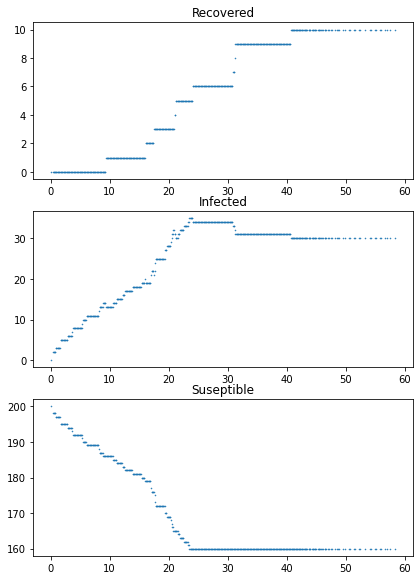

In [229]:
fig, axs = plt.subplots(3, 1,figsize=(6,8))
fig.tight_layout() 
axs[0].scatter(group_counts['simTime'],group_counts['group-rec'],s=0.3)
axs[0].set_title('Recovered')
axs[1].scatter(group_counts['simTime'],group_counts['group-i'],s=0.3)
axs[1].set_title('Infected')
axs[2].scatter(group_counts['simTime'],group_counts['group-s'],s=0.3)
axs[2].set_title('Suseptible')
